Малахов Дамир Домашняя работа 2

2.3.1


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
2.3.2


user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

Дубликаты:


,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


Слишком большой возраст:


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


Отрицательное количество покупок:


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


Нулевая выручка при ненулевых покупках:


,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


Были обнаружены проблемы качества в нескольких строках. Таковыми являются дубликаты, нереалистично большой возраст,
отрицательное количество покупок, а также нулевая выручка при ненулевых покупках
2.3.3


age
24.0     5
52.0     2
31.0     2
39.0     2
28.0     2
35.0     2
47.0     2
32.0     2
20.0     1
25.0     1
46.0     1
120.0    1
22.0     1
57.0     1
36.0     1
5.0      1
33.0     1
42.0     1
21.0     1
54.0     1
43.0     1
55.0     1
26.0     1
23.0     1
45.0     1
51.0     1
18.0     1
34.0     1
Name: count, dtype: int64

,total_purchases,average_revenue
country,,
CN,9,1054.000000
DE,39,1445.500000
FR,51,675.916667
RU,62,790.076923
US,37,557.375000


age_group
(0, 18]     1296.000000
(18, 35]     772.904762
(35, 60]     805.866667
Name: revenue, dtype: float64

В результате группировок видно, что по количеству покупок доминирует Россия, хоть она и имеет наименьший средний доход. Китай же, наоборот, имея наибольший доход, покупает меньше всего. В результате анализа возрастов покупателей видно, что чаще всего покупают несовершеннолетние.
2.4


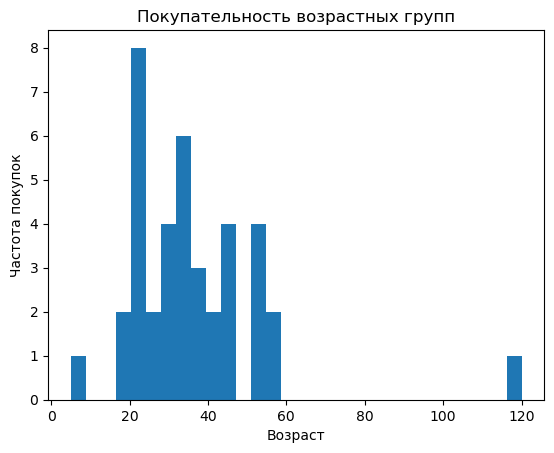

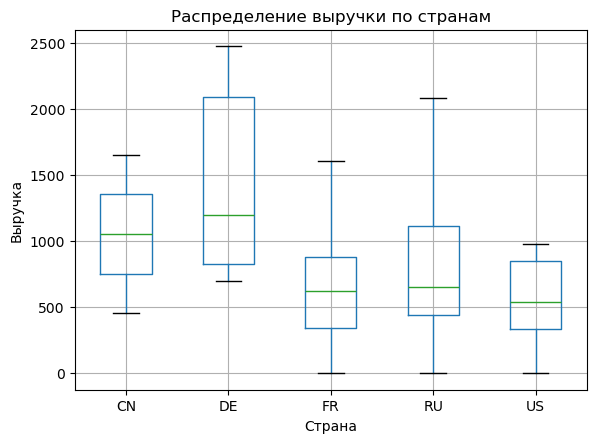

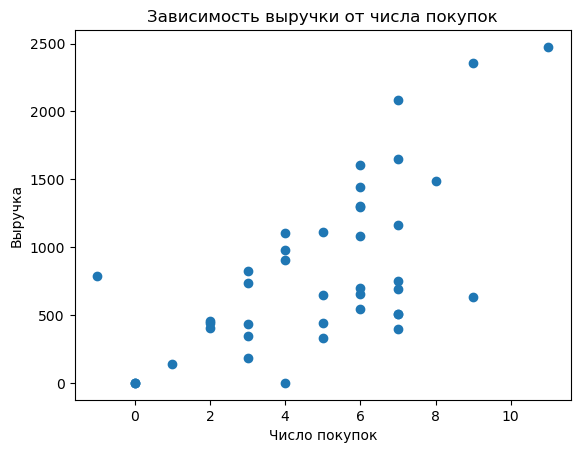

In [78]:
#2.3.1
#1)
import pandas as pd            # импорт важного
import numpy as np
import matplotlib.pyplot as plt
print('2.3.1')
#2)
df = pd.read_csv("S02-hw-dataset.csv")      # загрузка датасета
#3)
display(df.head())                 #вывод головы, информации о фрейме и описание
df.info()
df.describe()
print('2.3.2')
#2.3.2.
#1)
display(df.isna().mean())      # подсчёт доли пропусков
#2)
print('Дубликаты:')
display(df[df.duplicated()])     # вывод дубликатов
#3)
print('Слишком большой возраст:')
display(df[df["age"] > 100])               # аномалии
print('Отрицательное количество покупок:')
display(df[df["purchases"] < 0])
print('Нулевая выручка при ненулевых покупках:')
display(df[(df["revenue"] == 0) & (df["purchases"] > 0)])
print('''Были обнаружены проблемы качества в нескольких строках. Таковыми являются дубликаты, нереалистично большой возраст,
отрицательное количество покупок, а также нулевая выручка при ненулевых покупках''')

# Были обнаружены проблемы качества в нескольких строках. Таковыми являются дубликаты, нереалистично большой возраст,
# отрицательное количество покупок, а также нулевой доход при ненулевых покупках

print('2.3.3')
#2.3.3
#1)
display(df["age"].value_counts())               # возрастная частота
#2)
display(df.groupby("country").agg(               # частота покупок от страны
    total_purchases=("purchases", "sum"),
    average_revenue=("revenue", "mean")
))
#3)
df["age_group"] = pd.cut(df["age"], bins=[0, 18, 35, 60])   # обрезка на возрастные группы
display(df.groupby("age_group", observed=False)["revenue"].mean())    # выручка от возрастной группы
#4)
print('''В результате группировок видно, что по количеству покупок доминирует Россия, хоть она и имеет наименьший средний доход. Китай же, наоборот, имея наибольший доход, покупает меньше всего. В результате анализа возрастов покупателей видно, что чаще всего покупают несовершеннолетние.''')
# В результате группировок видно, что по количеству покупок доминирует Россия, хоть она и имеет наименьший средний доход. Китай же, наоборот, имея наибольший доход, покупает меньше всего. 
# В результате анализа возрастов покупателей видно, что чаще всего покупают несовершеннолетние.

print('2.4')
#2.4
#1)
plt.hist(df["age"], bins=30)         # гистограмма частоты по возрасту
plt.xlabel("Возраст")
plt.ylabel("Частота покупок")
plt.title("Покупательность возрастных групп")
plt.show()
#2)
df.boxplot(                                     # боксплот выручки от стран
    column="revenue",
    by="country",
    grid=True
)
plt.xlabel("Страна")                        
plt.ylabel("Выручка")
plt.title("Распределение выручки по странам")
plt.suptitle("")  
plt.show()
#3)
plt.scatter(df["purchases"], df["revenue"])                                 # диаграмма рассеяния зависимости выручки от числа покупок
plt.xlabel("Число покупок")
plt.ylabel("Выручка")
plt.title("Зависимость выручки от числа покупок")
plt.savefig("figures/price_hist.png")     #4          сохранение в файл
plt.show()



